# Notch and Crack Problem
<img src="Notch_Crack_problem.png">

In [1]:
from polarUtilities import *
from IPython.display import Math, Latex
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = sp.Function('f')(theta)
l = sp.Symbol('lambda')

For our simplicity we assume stresses to vary with $r^n$. Hence *Stress Function, $\phi$* can be assumed to vary with $r^{n+2}$. Since constants do not affect the solution, we take $\phi\propto r^n$. Thus finally we choose $\phi = r^\lambda f(\theta)$ where $\lambda$ is any specific value of n satisfying the problem conditions.

In [3]:
phi = r**(l)*f
display(Math(r'\phi = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

Computing the polar Laplacian $\nabla^2 \phi$ according to our assumed $\phi$-

In [4]:
polarLaplacian(phi)

r**(lambda - 2)*(lambda**2*f(theta) + Derivative(f(theta), (theta, 2)))

The biharmonic equation is $\nabla^4 \phi = 0$. This is used to obtain the $\theta$ dependent part of $\phi$ i.e. $f(\theta)$.

In [5]:
lhs = polarbiharmonic(phi)
rhs = 0
biharmonic_eq = sp.Eq(lhs,rhs)
display(biharmonic_eq.simplify())

Eq(r**(lambda - 4)*(lambda**4*f(theta) - 4*lambda**3*f(theta) + 4*lambda**2*f(theta) + 2*lambda**2*Derivative(f(theta), (theta, 2)) - 4*lambda*Derivative(f(theta), (theta, 2)) + 4*Derivative(f(theta), (theta, 2)) + Derivative(f(theta), (theta, 4))), 0)

In [6]:
f_s = sp.dsolve(biharmonic_eq,f)
display(Math(r'{}'.format(sp.latex(f_s))))

<IPython.core.display.Math object>

We can obtain the simplified version of *Stress Function*, $\phi$ from the results obtained above. In order to follow continuity with the book *Elasticity by Barber*, $\phi$ is defined as below-

In [7]:
A, B, C, D = sp.symbols('A, B, C, D')
phi = r**l*(A*sp.sin(l*theta) + B*sp.cos(l*theta) + C*sp.sin((l-2)*theta) + D*sp.cos((l-2)*theta))
display(Math(r'\phi = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

In [8]:
sigmarr = sp.collect(sigma_rr(phi),(A,B,C,D)).simplify()
sigmatt = sp.collect(sigma_tt(phi),(A,B,C,D)).simplify()
sigmart = sp.collect(sigma_rt(phi),(A,B,C,D)).simplify()

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigmarr))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigmatt))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We set Stress-Free boundary conditions around the crack region. As a result $\sigma_{\theta \theta} = \sigma_{r \theta} = 0$ at $\theta = 0$ and $\theta=2\pi$.

In [9]:
lhs1 = sigmatt.subs(theta,0)
rhs1 = 0
eq1 = sp.Eq(lhs1,rhs1)

lhs2 = sigmart.subs(theta,0)
rhs2 = 0
eq2 = sp.Eq(lhs2,rhs2)

sol, = sp.linsolve([eq1, eq2],[A,B])
A_sol = sol[0]
B_sol = sol[1]

display(Math(r' A = {}'.format(sp.latex(A_sol))))
display(Math(r' B = {}'.format(sp.latex(B_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
lhs3 = sigmatt.subs(theta,2*sp.pi).subs(A,A_sol).subs(B,B_sol).collect(C).collect(D)
rhs3 = 0
eq3 = sp.Eq(lhs3,rhs3)
display(eq3)

lhs4 = sigmart.subs(theta,2*sp.pi).subs(A,A_sol).subs(B,B_sol).collect(C).collect(D)
rhs4 = 0
eq4 = sp.Eq(lhs4,rhs4)
display(eq4)

Eq(lambda*r**(lambda - 2)*(C*((-1 + 2/lambda)*(lambda - 1)*sin(2*pi*lambda) - (1 - lambda)*sin(pi*(2*lambda - 4))) + D*(-(lambda - 1)*cos(2*pi*lambda) + (lambda - 1)*cos(pi*(2*lambda - 4)))), 0)

Eq(r**(lambda - 2)*(C*(-lambda*(-1 + 2/lambda)*(lambda - 1)*cos(2*pi*lambda) - (lambda**2 - 3*lambda + 2)*cos(pi*(2*lambda - 4))) + D*(-lambda*(lambda - 1)*sin(2*pi*lambda) - (-lambda**2 + 3*lambda - 2)*sin(pi*(2*lambda - 4)))), 0)

In [11]:
lhs_mat, rhs_mat = sp.linear_eq_to_matrix([eq3, eq4], [C, D])
det = lhs_mat.det().simplify()
eq = sp.Eq(det,0)
display(eq)

Eq(r**(2*lambda - 4)*(-4*lambda**2 + 8*lambda - 4)*sin(2*pi*lambda)**2, 0)

Thus we obtain a condition $sin(2\pi\lambda)=0$. Simplifying, we get $\lambda=\frac{n}{2}$ where n is some integer. However keeping several factors in mind, we have to set $\lambda=\frac{3}{2}$.

In [12]:
phi_crack = phi.subs(l,3/2)
display(Math(r'\phi_{{crack}} = {}'.format(sp.latex(phi_crack))))

sol, = sp.linsolve([eq1, eq2],[C,D])
C_sol = sol[0]
D_sol = sol[1]

sigma_rr_crack = sigmarr.subs(C,C_sol).subs(D,D_sol).subs(l,3/2).collect(A).collect(B)
sigma_tt_crack = sigmatt.subs(C,C_sol).subs(D,D_sol).subs(l,3/2).collect(A).collect(B)
sigma_rt_crack = sigmart.subs(C,C_sol).subs(D,D_sol).subs(l,3/2).collect(A).collect(B)

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sometimes it is convenient to express the stresses in terms of the angle $\upsilon$ measured from direction of crack propagation, instead of $\theta$.

In [13]:
v = sp.Symbol('Upsilon')

sigma_rr_crack_v = sigma_rr_crack.subs(theta,2*sp.pi-v).simplify()
sigma_tt_crack_v = sigma_tt_crack.subs(theta,2*sp.pi-v).simplify()
sigma_rt_crack_v = sigma_rt_crack.subs(theta,2*sp.pi-v).simplify()

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack_v))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack_v))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack_v))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Clearly we see 2 kinds of terms appearing in the stresses. The terms with *A* are symmetric in nature, while terms with *B* are anti-symmetric in nature. The symmetric terms are normally called as *opening* or *mode-I* crack, while the anti-symmetric terms are called as *shearing* or *mode-II* crack. We will study about them individually under the sections below.

### For *Mode-I* crack -

In [14]:
sigma_rr_crack_I = sigma_rr_crack.subs(B,0)
sigma_tt_crack_I = sigma_tt_crack.subs(B,0)
sigma_rt_crack_I = sigma_rt_crack.subs(B,0)

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack_I))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack_I))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack_I))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

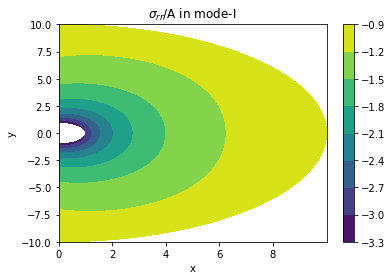

In [15]:
rbar = np.linspace(1, 10, 100)
tbar = np.linspace(-np.pi/2, np.pi/2, 100)
R, T = np.meshgrid(rbar, tbar)

sigmarr_num = -(3/2)*(1/R**0.5)*np.cos(T/2)*(3-np.cos(T))
sigmatt_num = -(3/2)*(1/R**0.5)*np.cos(T/2)*(1+np.cos(T))
sigmart_num =  (3/2)*(1/R**0.5)*np.sin(T/2)*(1+np.cos(T))

X, Y = R*np.cos(T), R*np.sin(T)

fig11,ax11 = plt.subplots(1,1)
cp= ax11.contourf(X,Y,sigmarr_num)
fig11.colorbar(cp)
ax11.set_title('$\sigma_{rr}$/A in mode-I')
ax11.set_xlabel('x')
ax11.set_ylabel('y')
plt.show()

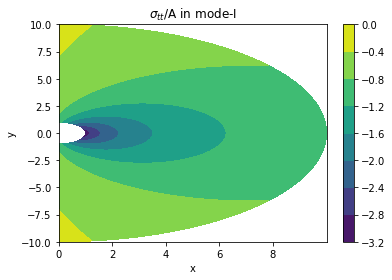

In [16]:
fig12,ax12 = plt.subplots(1,1)
cp= ax12.contourf(X,Y,sigmatt_num)
fig12.colorbar(cp)
ax12.set_title('$\sigma_{tt}$/A in mode-I')
ax12.set_xlabel('x')
ax12.set_ylabel('y')
plt.show()

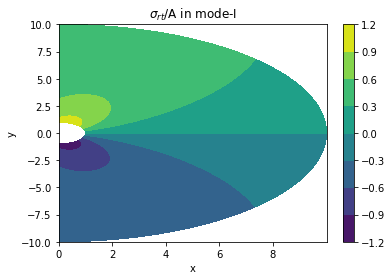

In [17]:
fig13,ax13 = plt.subplots(1,1)
cp= ax13.contourf(X,Y,sigmart_num)
fig13.colorbar(cp)
ax13.set_title('$\sigma_{rt}$/A in mode-I')
ax13.set_xlabel('x')
ax13.set_ylabel('y')
plt.show()

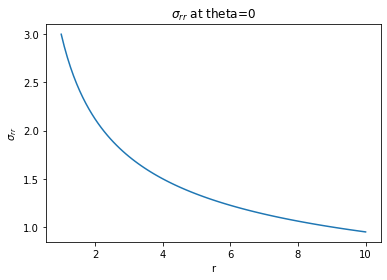

In [31]:
x = rbar
sigmarr_num_crack = -(3/2)*(1/rbar**0.5)*(3-1)
sigmatt_num_crack = -(3/2)*(1/rbar**0.5)*(1+1)
sigmart_num_crack =  0

plt.plot(x,np.absolute(sigmarr_num_crack))
plt.title('$\sigma_{rr}$ at theta=0')
plt.xlabel('r')
plt.ylabel('$\sigma_{rr}$')
plt.show()

### For *Mode-II* crack -

In [19]:
sigma_rr_crack_II = sigma_rr_crack.subs(A,0)
sigma_tt_crack_II = sigma_tt_crack.subs(A,0)
sigma_rt_crack_II = sigma_rt_crack.subs(A,0)

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack_II))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack_II))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack_II))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

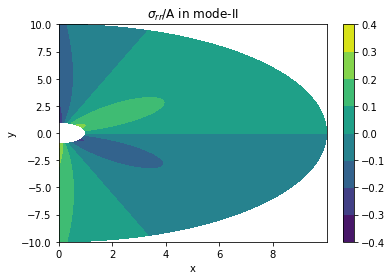

In [20]:
rbar = np.linspace(1, 10, 100)
tbar = np.linspace(-np.pi/2, np.pi/2, 100)
R, T = np.meshgrid(rbar, tbar)

sigmarr_num = -(1/2)*(1/R**0.5)*np.sin(T/2)*(1-3*np.cos(T))
sigmatt_num = -(3/2)*(1/R**0.5)*np.cos(T/2)*(1+np.cos(T))
sigmart_num =  (1/2)*(1/R**0.5)*np.cos(T/2)*(1-3*np.cos(T))

X, Y = R*np.cos(T), R*np.sin(T)

fig21,ax21 = plt.subplots(1,1)
cp= ax21.contourf(X,Y,sigmarr_num)
fig21.colorbar(cp)
ax21.set_title('$\sigma_{rr}$/A in mode-II')
ax21.set_xlabel('x')
ax21.set_ylabel('y')
plt.show()

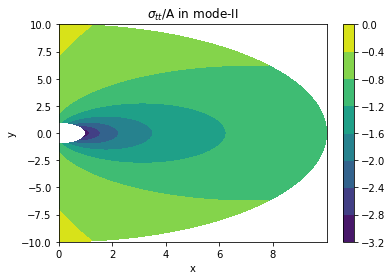

In [21]:
fig22,ax22 = plt.subplots(1,1)
cp= ax22.contourf(X,Y,sigmatt_num)
fig22.colorbar(cp)
ax22.set_title('$\sigma_{tt}$/A in mode-II')
ax22.set_xlabel('x')
ax22.set_ylabel('y')
plt.show()

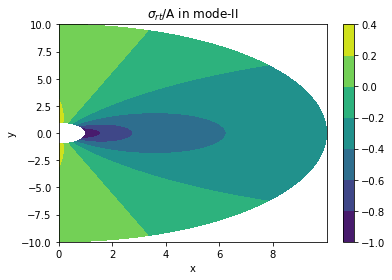

In [22]:
fig23,ax23 = plt.subplots(1,1)
cp= ax23.contourf(X,Y,sigmart_num)
fig23.colorbar(cp)
ax23.set_title('$\sigma_{rt}$/A in mode-II')
ax23.set_xlabel('x')
ax23.set_ylabel('y')
plt.show()

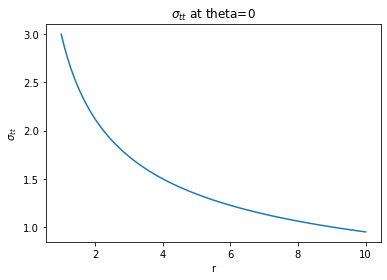

In [32]:
x = rbar
sigmarr_num_crack =  0
sigmatt_num_crack = -(3/2)*(1/rbar**0.5)*(1+1)
sigmart_num_crack =  (1/2)*(1/rbar**0.5)*(1-3)

plt.plot(x,np.absolute(sigmatt_num_crack))
plt.title('$\sigma_{tt}$ at theta=0')
plt.xlabel('r')
plt.ylabel('$\sigma_{tt}$')
plt.show()

We will now generate the strains for each mode from the stresses obained.
## Strains for Mode-I type crack-

In [24]:
epsilonrr_I = epsilon_rr(sigma_rr_crack_I,sigma_tt_crack_I).collect(nu)
epsilontt_I = epsilon_tt(sigma_tt_crack_I,sigma_rr_crack_I).collect(nu)
epsilonrt_I = epsilon_rt(sigma_rt_crack_I)

display(Math(r'\epsilon_{{rr}} = {}'.format(sp.latex(epsilonrr_I))))
display(Math(r'\epsilon_{{\theta \theta}} = {}'.format(sp.latex(epsilontt_I))))
display(Math(r'\epsilon_{{r\theta}} = {}'.format(sp.latex(epsilonrt_I))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Strains for Mode-II type crack-

In [25]:
epsilonrr_II = epsilon_rr(sigma_rr_crack_II,sigma_tt_crack_II).collect(nu)
epsilontt_II = epsilon_tt(sigma_tt_crack_II,sigma_rr_crack_II).collect(nu)
epsilonrt_II = epsilon_rt(sigma_rt_crack_II)

display(Math(r'\epsilon_{{rr}} = {}'.format(sp.latex(epsilonrr_II))))
display(Math(r'\epsilon_{{\theta \theta}} = {}'.format(sp.latex(epsilontt_II))))
display(Math(r'\epsilon_{{r\theta}} = {}'.format(sp.latex(epsilonrt_II))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Displacements for Mode-I type crack-

In [26]:
u = sp.Function('u')(r, theta)
f1= sp.Function('f1')

lhs1 = sp.diff(u,r)
rhs1 = epsilonrr_I
disp_eq1  = sp.Eq(lhs1,rhs1)
display(disp_eq1)

sol = sp.pdsolve(disp_eq1, solvefun = f1)
u_sol = sol.rhs.expand()
display(Math(r'u(r,\theta) = {}'.format(sp.latex(u_sol))))

Eq(Derivative(u(r, theta), r), A*r**(-0.5)*(nu*(2.25*sin(0.5*theta) - 0.75*sin(1.5*theta)) - 3.75*sin(0.5*theta) - 0.75*sin(1.5*theta))/E)

<IPython.core.display.Math object>

In [27]:
v = sp.Function('v')(r, theta)
f2= sp.Function('f2')

lhs2 = sp.diff(v,theta)
rhs2 = epsilontt_I*r-u_sol
disp_eq2  = sp.Eq(lhs2,rhs2)
display(disp_eq2)

sol = sp.pdsolve(disp_eq2, solvefun = f2)
v_sol = sol.rhs.expand()
display(Math(r'v(r,\theta) = {}'.format(sp.latex(v_sol))))

Eq(Derivative(v(r, theta), theta), -4.5*A*nu*r**0.5*sin(0.5*theta)/E + 1.5*A*nu*r**0.5*sin(1.5*theta)/E + A*r**0.5*(nu*(3.75*sin(0.5*theta) + 0.75*sin(1.5*theta)) - 2.25*sin(0.5*theta) + 0.75*sin(1.5*theta))/E + 7.5*A*r**0.5*sin(0.5*theta)/E + 1.5*A*r**0.5*sin(1.5*theta)/E - f1(-theta))

<IPython.core.display.Math object>

In [28]:
lhs3 = 1/2*(sp.diff(v_sol,r)-v_sol/r+(1/r)*sp.diff(u_sol,theta))
rhs3 = epsilonrt_I
eq3  = sp.Eq(lhs3.expand(),rhs3).expand()
display(eq3)

Eq(0.75*A*nu*r**(-0.5)*cos(0.5*theta)/E - 0.75*A*nu*r**(-0.5)*cos(1.5*theta)/E + 0.75*A*r**(-0.5)*cos(0.5*theta)/E - 0.75*A*r**(-0.5)*cos(1.5*theta)/E + 0.5*Derivative(f2(r), r) - 0.5*f2(r)/r + 0.5*Integral(f1(-xi), (xi, theta))/r - 0.5*Subs(Derivative(f1(_xi_1), _xi_1), _xi_1, -theta)/r, 0.75*A*nu*r**(-0.5)*cos(0.5*theta)/E - 0.75*A*nu*r**(-0.5)*cos(1.5*theta)/E + 0.75*A*r**(-0.5)*cos(0.5*theta)/E - 0.75*A*r**(-0.5)*cos(1.5*theta)/E)

In [29]:
f1_c = sp.Function('f1')(theta)
f2_c = sp.Function('f2')(r)

eq1 = sp.Eq(sp.diff(f1_c,theta,2)+f1_c,0)
eq2 = sp.Eq(sp.diff(f2_c,r)-f2_c/r,0)
display(eq1)
display(eq2)

f1_sol = sp.dsolve(eq1)
f2_sol = sp.dsolve(eq2)
display(f1_sol)
display(f2_sol)

Eq(f1(theta) + Derivative(f1(theta), (theta, 2)), 0)

Eq(Derivative(f2(r), r) - f2(r)/r, 0)

Eq(f1(theta), C1*sin(theta) + C2*cos(theta))

Eq(f2(r), C1*r)

In [30]:
F1, F2, F3 = sp.symbols('F1,F2,F3')
F = sp.Function('F')
zeta = sp.Symbol('zeta')
f1_c = -F1*sp.sin(theta) + F2*sp.cos(theta)
f2_c = F3*r

u_sol = u_sol.subs(f1(-theta),f1_c)
display(Math(r'u(x,y) = {}'.format(sp.latex(u_sol))))

lhs2 = sp.diff(v,theta)
rhs2 = epsilontt_I*r-u_sol
disp_eq2  = sp.Eq(lhs2,rhs2)
sol = sp.pdsolve(disp_eq2)
v_sol = sol.rhs.expand().subs(F(r),f2_c)
display(Math(r'v(x,y) = {}'.format(sp.latex(v_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Displacements for Mode-II type crack-

In [34]:
u = sp.Function('u')(r, theta)
f1= sp.Function('f1')

lhs1 = sp.diff(u,r)
rhs1 = epsilonrr_II
disp_eq1  = sp.Eq(lhs1,rhs1)
display(disp_eq1)

sol = sp.pdsolve(disp_eq1, solvefun = f1)
u_sol = sol.rhs.expand()
display(Math(r'u(r,\theta) = {}'.format(sp.latex(u_sol))))

Eq(Derivative(u(r, theta), r), B*r**(-0.5)*(nu*(0.75*cos(0.5*theta) - 0.75*cos(1.5*theta)) - 1.25*cos(0.5*theta) - 0.75*cos(1.5*theta))/E)

<IPython.core.display.Math object>

In [36]:
v = sp.Function('v')(r, theta)
f2= sp.Function('f2')

lhs2 = sp.diff(v,theta)
rhs2 = epsilontt_II*r-u_sol
disp_eq2  = sp.Eq(lhs2,rhs2)
display(disp_eq2)

sol = sp.pdsolve(disp_eq2, solvefun = f2)
v_sol = sol.rhs.expand()
display(Math(r'v(r,\theta) = {}'.format(sp.latex(v_sol))))

Eq(Derivative(v(r, theta), theta), -1.5*B*nu*r**0.5*cos(0.5*theta)/E + 1.5*B*nu*r**0.5*cos(1.5*theta)/E + B*r**0.5*(nu*(1.25*cos(0.5*theta) + 0.75*cos(1.5*theta)) - 0.75*cos(0.5*theta) + 0.75*cos(1.5*theta))/E + 2.5*B*r**0.5*cos(0.5*theta)/E + 1.5*B*r**0.5*cos(1.5*theta)/E - f1(-theta))

<IPython.core.display.Math object>

In [37]:
lhs3 = 1/2*(sp.diff(v_sol,r)-v_sol/r+(1/r)*sp.diff(u_sol,theta))
rhs3 = epsilonrt_II
eq3  = sp.Eq(lhs3.expand(),rhs3).expand()
display(eq3)

Eq(-0.25*B*nu*r**(-0.5)*sin(0.5*theta)/E + 0.75*B*nu*r**(-0.5)*sin(1.5*theta)/E - 0.25*B*r**(-0.5)*sin(0.5*theta)/E + 0.75*B*r**(-0.5)*sin(1.5*theta)/E + 0.5*Derivative(f2(r), r) - 0.5*f2(r)/r + 0.5*Integral(f1(-xi), (xi, theta))/r - 0.5*Subs(Derivative(f1(_xi_1), _xi_1), _xi_1, -theta)/r, -0.25*B*nu*r**(-0.5)*sin(0.5*theta)/E + 0.75*B*nu*r**(-0.5)*sin(1.5*theta)/E - 0.25*B*r**(-0.5)*sin(0.5*theta)/E + 0.75*B*r**(-0.5)*sin(1.5*theta)/E)

In [38]:
f1_c = sp.Function('f1')(theta)
f2_c = sp.Function('f2')(r)

eq1 = sp.Eq(sp.diff(f1_c,theta,2)+f1_c,0)
eq2 = sp.Eq(sp.diff(f2_c,r)-f2_c/r,0)
display(eq1)
display(eq2)

f1_sol = sp.dsolve(eq1)
f2_sol = sp.dsolve(eq2)
display(f1_sol)
display(f2_sol)

Eq(f1(theta) + Derivative(f1(theta), (theta, 2)), 0)

Eq(Derivative(f2(r), r) - f2(r)/r, 0)

Eq(f1(theta), C1*sin(theta) + C2*cos(theta))

Eq(f2(r), C1*r)

In [39]:
F1, F2, F3 = sp.symbols('F1,F2,F3')
F = sp.Function('F')
zeta = sp.Symbol('zeta')
f1_c = -F1*sp.sin(theta) + F2*sp.cos(theta)
f2_c = F3*r

u_sol = u_sol.subs(f1(-theta),f1_c)
display(Math(r'u(x,y) = {}'.format(sp.latex(u_sol))))

lhs2 = sp.diff(v,theta)
rhs2 = epsilontt_II*r-u_sol
disp_eq2  = sp.Eq(lhs2,rhs2)
sol = sp.pdsolve(disp_eq2)
v_sol = sol.rhs.expand().subs(F(r),f2_c)
display(Math(r'v(x,y) = {}'.format(sp.latex(v_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### References-
1. Sadd MH: Elasticity: Theory, Applications, and Numerics, Academic Press, 30 Corporate Drive, Suite 400, Burlington, MA 01803, USA, 2009
2. Barber JR: Elasticity, Kluwer, Dordrecht, The Netherlands, 1992.
3. Tada H, Paris PC, and Irwin GR: The Stress Analysis of Cracks Handbook, 3rd ed., American Society of Mechanical Engineers, New York, 2000.